# Whistle Detection

## Dataset Preparation

In [2]:
import warnings
warnings.filterwarnings("ignore")
from datamodules.whistle import WhistleDataset
from models.whistlenet.config import DATA_PARAMS

dataset = WhistleDataset(name = 'whistle/saved/smotenn', tobeloaded=True, params=DATA_PARAMS)
dataset.summarize()

DATA LOADED!

N Examples: 643762
N Classes: 2
Classes: [0. 1.]
 - Class 0: 321881 (50.0)
 - Class 1: 321881 (50.0)


## Training

MODEL LOADED!


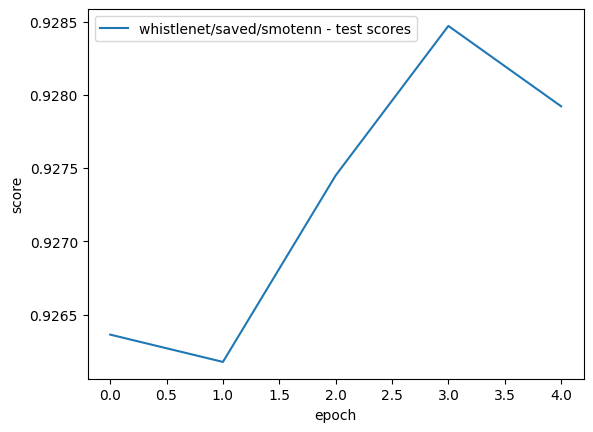

In [5]:
from models.whistlenet.whistlenet import WhistleNet
from models.whistlenet.config import TRAIN_PARAMS
from core.trainer import Trainer
import time
import matplotlib.pyplot as plt # type: ignore

complete_plot = False
train_model = False
names = []
names.append('whistlenet/saved/smotenn') # TODO hardcodato
for name in names:
    model = WhistleNet(name,num_classes=5)
    trainer = Trainer(params=TRAIN_PARAMS)
    
    start_time = time.time()
    if not train_model:
        model.load(name)
    else:
        trainer.fit(model,dataset)
    model.training_time = time.time() - start_time
    
    plt.plot(model.test_scores, label=f'{name} - test scores')
    if complete_plot:
        plt.plot(model.train_scores, label=f'{name} - train scores')
        plt.plot(model.val_scores, label=f'{name} - val scores')
        
plt.legend()
plt.ylabel('score')
plt.xlabel('epoch')
plt.show()

## Inference

In [6]:
import torch
import sounddevice as sd
from datamodules.whistle import Audio

def classify(window):
    with torch.no_grad():
        prediction = model(window)
    predicted_class = torch.argmax(prediction).item()
    if predicted_class == 0:
        print(f"{prediction}: NO")
    else:
        print(f"{prediction}: YES")
    return predicted_class


# audio = Audio(name="test4", datapath='/home/flavio/code/whistle-detector/data/whistle/raw/test')
# for i in range(audio.S.shape[1]):
#     window = audio.S[:,i].reshape(1,1,513)
#     print(f"frame {i}, time {audio.frame2time(i):.2f}")
#     classify(window)
# audio.freq_plot()